In [3]:
from Quantile import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import *
from tqdm import tqdm
%load_ext autoreload
%autoreload 2
%load_ext line_profiler

ModuleNotFoundError: No module named 'MAD'

In [1]:
from RobustGibbs.Quantile import Gibbs_Quantile

In [3]:
filo=pd.read_csv('FILO2019_DEC_COM.csv',sep=';')

/Users/antoineluciano/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
filo.head()


,CODGEO,NBMEN19,NBPERS19,NBUC19,PMIMP19,Q119,Q219,Q319,Q3_Q1,D119,...,OPR5D919,OPR5RD,OPR5S80S2019,OPR5GI19,OPR5PACT19,OPR5PTSA19,OPR5PCHO19,OPR5PBEN19,OPR5PPEN19,OPR5PAUT19
0,1001,322,819,542.7,NaN,NaN,24210,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1002,114,267,179.5,NaN,NaN,23380,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1004,6713,15041,10298.9,56.0,11970.0,19690,27930.0,15970.0,6250.0,...,150250.0,84.9,158.8,0.8,9.2,NaN,NaN,NaN,4.3,86.5
3,1005,720,1823,1204.3,NaN,NaN,24100,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1007,1163,2857,1892.3,63.0,17360.0,23340,30630.0,13270.0,11110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
col=list(filo.columns)
for i in range(len(col)):
    col[i]=col[i].replace("19","")
print(col)
filo.rename(columns=dict(zip(filo.columns,col)),inplace=True)
filo.columns

['CODGEO', 'NBMEN', 'NBPERS', 'NBUC', 'PMIMP', 'Q1', 'Q2', 'Q3', 'Q3_Q1', 'D1', 'D2', 'D3', 'D4', 'D6', 'D7', 'D8', 'D9', 'RD', 'S80S20', 'GI', 'PACT', 'PTSA', 'PCHO', 'PBEN', 'PPEN', 'PAUT', 'AGE1Q1', 'AGE1Q2', 'AGE1Q3', 'AGE1Q3_Q1', 'AGE1D1', 'AGE1D2', 'AGE1D3', 'AGE1D4', 'AGE1D6', 'AGE1D7', 'AGE1D8', 'AGE1D9', 'AGE1RD', 'AGE1S80S20', 'AGE1GI', 'AGE1PACT', 'AGE1PTSA', 'AGE1PCHO', 'AGE1PBEN', 'AGE1PPEN', 'AGE1PAUT', 'AGE2Q1', 'AGE2Q2', 'AGE2Q3', 'AGE2Q3_Q1', 'AGE2D1', 'AGE2D2', 'AGE2D3', 'AGE2D4', 'AGE2D6', 'AGE2D7', 'AGE2D8', 'AGE2D9', 'AGE2RD', 'AGE2S80S20', 'AGE2GI', 'AGE2PACT', 'AGE2PTSA', 'AGE2PCHO', 'AGE2PBEN', 'AGE2PPEN', 'AGE2PAUT', 'AGE3Q1', 'AGE3Q2', 'AGE3Q3', 'AGE3Q3_Q1', 'AGE3D1', 'AGE3D2', 'AGE3D3', 'AGE3D4', 'AGE3D6', 'AGE3D7', 'AGE3D8', 'AGE3D9', 'AGE3RD', 'AGE3S80S20', 'AGE3GI', 'AGE3PACT', 'AGE3PTSA', 'AGE3PCHO', 'AGE3PBEN', 'AGE3PPEN', 'AGE3PAUT', 'AGE4Q1', 'AGE4Q2', 'AGE4Q3', 'AGE4Q3_Q1', 'AGE4D1', 'AGE4D2', 'AGE4D3', 'AGE4D4', 'AGE4D6', 'AGE4D7', 'AGE4D8', 'AGE4D9'

Index(['CODGEO', 'NBMEN', 'NBPERS', 'NBUC', 'PMIMP', 'Q1', 'Q2', 'Q3', 'Q3_Q1',
       'D1',
       ...
       'OPR5D9', 'OPR5RD', 'OPR5S80S20', 'OPR5GI', 'OPR5PACT', 'OPR5PTSA',
       'OPR5PCHO', 'OPR5PBEN', 'OPR5PPEN', 'OPR5PAUT'],
      dtype='object', length=572)

In [13]:
np.min(filo.iloc[np.where(pd.notna(filo["D1"]))]["NBMEN"]),np.max(filo.iloc[np.where(pd.notna(filo["D1"]))]["NBMEN"])

(700, 1041459)

In [14]:
C=np.array([str(cod)[:2] for cod in list(filo["CODGEO"])]).astype(str)


In [15]:
filo=filo.drop(np.where(C=="2A")[0])
filo=filo.drop(np.where(C=="2B")[0])

In [16]:
int_codegeo=filo["CODGEO"].astype(int)

In [17]:
np.unique(int_codegeo)

array([ 1001,  1002,  1004, ..., 97422, 97423, 97424])

In [18]:
AM=filo.iloc[np.where(np.logical_and(int_codegeo<7000,int_codegeo>=6000))]
AM.shape

(135, 572)

In [19]:
AM=AM.iloc[np.where(pd.notna(AM["Q1"]))[0]]
AM=AM.iloc[np.where(AM["NBPERS"]<10000)[0]]

AM.shape

(37, 572)

In [20]:
N_AM=np.array(AM["NBPERS"].astype(int))
Q_AM=np.array(AM[["D1","D2","Q1","D3","D4","Q2","D6","D7","Q3","D8","D9"]].astype(float))
P_AM=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9]

In [121]:
len(np.where(N_AM<10000)[0])

37

(array([4., 2., 3., 3., 5., 6., 1., 2., 2., 1., 0., 0., 1., 1., 0., 2., 1.,
        1., 1., 1.]),
 array([2004.  , 2393.65, 2783.3 , 3172.95, 3562.6 , 3952.25, 4341.9 ,
        4731.55, 5121.2 , 5510.85, 5900.5 , 6290.15, 6679.8 , 7069.45,
        7459.1 , 7848.75, 8238.4 , 8628.05, 9017.7 , 9407.35, 9797.  ]),
 <BarContainer object of 20 artists>)

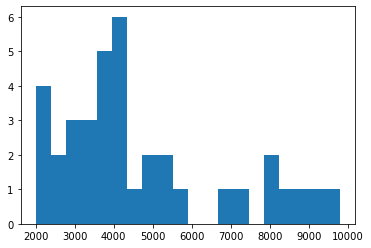

In [21]:
plt.hist(N_AM,bins=20)

In [22]:
np.where(np.logical_and(pd.notna(filo["Q1"]),pd.isna(filo["Q3_Q1"])))

(array([], dtype=int64),)

In [23]:
len(Q_AM[0]),len(P_AM)

(11, 11)

In [243]:
def Gibbs_Quantile_Hierarchic(T,N,Q,P,n_chains,distribution,par_prior=[0,1,1,1,1,1,1,1,1,1,1,1],std_prop1=0.1,std_prop2=0.1,std_prop3=0.1,std_prop_quantile=0.1,std_prior1=.1,std_prior2=.1,List_X=False,epsilon=0.001,verbose=True,shape=1):
    K=len(Q)
    print(K)
    X,I,G,q_sim,q_tot,K_L=[],[],[],[],[],[]
    loc,scale=[],[]
    #print(P)
    for k in range(K):
        if distribution=="weibull2": loc=np.repeat(0,K)
        else: loc.append(Q[k][0]-(Q[k][1]-Q[k][0]))
        shape=np.repeat(1.5,K)
        #print(loc[k],shape[k],P[k][0],P[k][-1])
        
        #print((scipy.stats.weibull_min(shape[k],loc=loc[k]).ppf(P[k][-1])))
        scale.append((Q[k][-1]-Q[k][0])/(scipy.stats.weibull_min(shape[k],loc=loc[k]).ppf(P[k][-1])-scipy.stats.weibull_min(shape[k],loc=loc[k]).ppf(P[k][0])))
        theta=np.array([loc,scale,shape]).T
        xk,ik,gk,q_simk,q_totk,k=Quantile_Init2(Q[k],P[k],N[k],loc[k],scale[k],distribution,epsilon=epsilon,shape=shape[k])
        X.append(xk)
        I.append(ik)
        G.append(gk)
        q_sim.append(q_simk)
        q_tot.append(q_totk)
        K_L.append(k)
    # a1_init=1/(2*(np.log(np.mean(scale))-np.mean(np.log(scale))))
    # b1_init=a1_init/np.mean(scale)
    # a2_init=1/(2*(np.log(np.mean(shape))-np.mean(np.log(shape))))
    # b2_init=a1_init/np.mean(shape)
    
    a1_init,b1_init=1,1
    a2_init,b2_init=1,1
    if distribution=="weibull2":theta_0=[a1_init,b1_init,a2_init,b2_init]
    else:theta_0=[np.mean(loc),np.std(loc),a1_init,b1_init,a2_init,b2_init]
    #print(theta_0)

    Theta=[theta]
    Theta_0=[theta_0]
    X_list=[X]
    Mean=[np.mean(X)]
    Std=[np.std(X)]
    Q_Tot=[q_tot]
    Q_Sim=[q_sim]
    
    for i in tqdm(range(T),disable=not(verbose)):
        X,q_simm,q_tott=[],[],[]
        loc=np.copy(loc)
        scale=np.copy(scale)
        shape=np.copy(shape)
        for k in range(K):
            xk,q_simk,q_totk=X_Q(Q[k],q_sim[k],q_tot[k],N[k],Theta[-1][k][0],Theta[-1][k][1],K_L[k],I[k],G[k],distribution,std_prop_quantile,shape=Theta[-1][k][2])
            X.append(xk)
            q_simm.append(list(q_simk))
            q_tott.append(list(q_totk))
            #print(Theta_0[-1][:2],std_prop1,Theta[-1])
            #print("ici",Theta[-1][k][0],Theta[-1][k][1],Theta[-1][2])
          
  
            if distribution=="weibull2": loc=np.repeat(0,K)
        
            else : loc[k]=post_weibull_loc(Theta[-1][k][0],Theta[-1][k][1],Theta[-1][k][2],xk,Theta_0[-1][:2],std_prop1)
            scale[k]=post_weibull_scale(loc[k],Theta[-1][k][1],Theta[-1][k][2],xk,Theta_0[-1][-4:-2],std_prop2)
            shape[k]=post_weibull_k(loc[k],scale[k],Theta[-1][k][2],xk,Theta_0[-1][-2:],std_prop3)
            
            theta=np.array([loc,scale,shape]).T
            if distribution=="weibull":mu_0,sigma_0=post_NG(loc,par_prior[:4],1)
            a1,b1=post_gamma_MH(Theta_0[-1][-4:-2],scale,par_prior[-8:-4],1,std_prior1,std_prior2)
            a2,b2=post_gamma_MH(Theta_0[-1][-2:],shape,par_prior[-4:],1,std_prior1,std_prior2)
            if distribution=="weibull2":theta_0=[a1,b1,a2,b2]   
            else:theta_0=[mu_0,sigma_0,a1,b1,a2,b2]     
        Theta.append(theta)
        Theta_0.append(theta_0)
        Mean.append(np.mean(X))
        Std.append(np.std(X))
 
        Q_Tot.append(list(q_tott))
        
        Q_Sim.append(list(q_simm))
        if List_X: X_list.append(X)
        
    if not(List_X): X_list.append(X)
    Theta=np.array(Theta).T
    Theta_0=np.array(Theta_0).T
    if verbose: 
        Q=np.array(Q_Sim).T
        print("Q.shape=",Q.shape)
        print("theta.shape=",np.array(Theta).shape)
        print("theta0.shape=",np.array(Theta_0).shape)
        for i in range(Q.shape[0]):
            q=Q[i]
            print("Acceptance rate of Q {} = {:.2%}".format(i,np.mean([len(np.unique(q[k]))/(T+1) for k in range(K)])))
    if verbose:
        print("Acceptation rate of loc = {:.2%}, of scale = {:.2%} and of shape = {:.2%}".format(np.mean([len(np.unique(Theta[0,k]))/T for k in range(K)]),np.mean([len(np.unique(Theta[1,k]))/T for k in range(K)]),np.mean([len(np.unique(Theta[2,k]))/T for k in range(K)])))
        print(len(np.unique(Theta_0[0])))
        if distribution=="weibull": l=2
        else:l=0
        print("Acceptation rate of a1 = {:.2%}, b1 = {:.2%}, a2 = {:.2%}, b2 = {:.2%}".format(len(np.unique(Theta_0[l]))/T ,len(np.unique(Theta_0[l+1]))/(T+1) ,len(np.unique(Theta_0[l+2]))/(T+1) ,len(np.unique(Theta_0[l+3]))/(T+1) ))
    return {"X":X_list,"Mean":Mean,"Std":Std,"chains":Theta,"chains_0":Theta_0,"Q_sim":np.array(Q_Sim),"Q_tot":np.array(Q_Tot),"I":I,"K":K,"G":G,"par_prior":par_prior,"distribution":distribution,"Q":Q,"P":P,"N":N}



In [253]:
K=2
np.repeat([.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9],K).reshape(11,K).T


array([[0.1 , 0.2 , 0.25, 0.3 , 0.4 , 0.5 , 0.6 , 0.7 , 0.75, 0.8 , 0.9 ],
       [0.1 , 0.2 , 0.25, 0.3 , 0.4 , 0.5 , 0.6 , 0.7 , 0.75, 0.8 , 0.9 ]])

In [254]:
K=2
P_AM=np.repeat([.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9],K).reshape(11,K).T
w2=Gibbs_Quantile_Hierarchic(1000,N_AM[:K],Q_AM[:K],P_AM,1,"weibull",par_prior=[0,10,2,2,2,2],std_prop1=.1,std_prop2=.1,std_prop3=.1,std_prop_quantile=.02,std_prior1=.1,std_prior2=.1,verbose=True)

2


/Users/antoineluciano/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app
/Users/antoineluciano/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/numpy/core/_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


ValueError: operands could not be broadcast together with shapes (2210,) (3364,) 

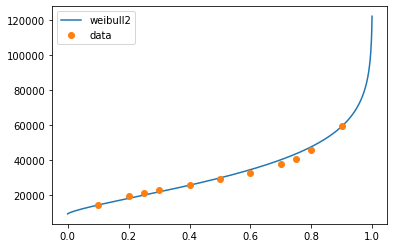

In [225]:
x=np.linspace(0,1,1000)
plt.plot(x,weibull_min(c=1.35,scale=27000,loc=9000).ppf(x),label="weibull2")
plt.plot(P_AM,Q_AM[0],'o',label="data")
plt.legend()

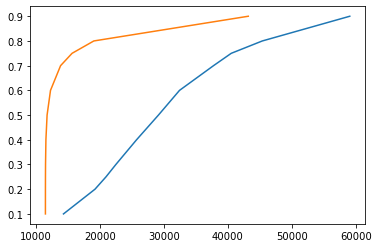

In [218]:
plt.plot(Q_AM[0],P_AM)
plt.plot(weibull_min(c=.25,scale=1127,loc=11500).ppf(P_AM),P_AM)

11524.840838315724 1127.555851568648 0.2539903825652687


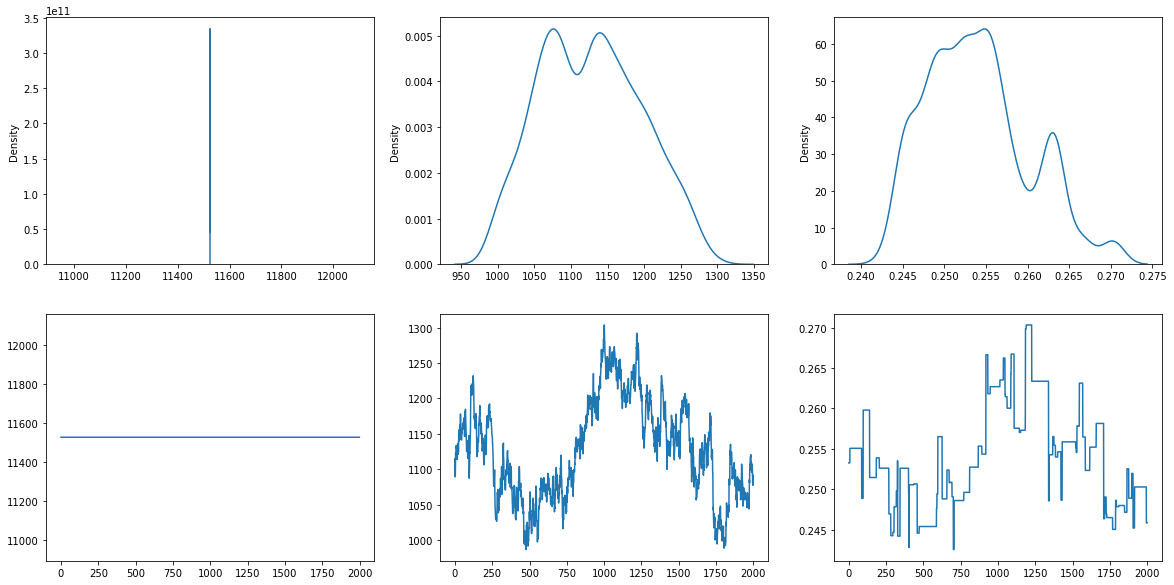

In [217]:
f,ax=plt.subplots(2,3,figsize=(20,10))
Gibbs=w2
i=0
burnin=8000
fin=10000
print(np.mean(Gibbs["chains"][0][burnin:]),np.mean(Gibbs["chains"][1][burnin:]),np.mean(Gibbs["chains"][2][burnin:]))
sns.kdeplot(Gibbs["chains"][0][burnin:fin],ax=ax[0,0])
ax[1,0].plot(Gibbs["chains"][0][burnin:fin])

sns.kdeplot(Gibbs["chains"][1][burnin:fin],ax=ax[0,1])
ax[1,1].plot(Gibbs["chains"][1][burnin:fin])

sns.kdeplot(Gibbs["chains"][2][burnin:fin],ax=ax[0,2])
ax[1,2].plot(Gibbs["chains"][2][burnin:fin])


In [138]:
W2=[]
T=1000
K=len(N_AM)
for i in tqdm(range(K)):
    W2.append(Gibbs_Quantile(T,N_AM[i],Q_AM[i],P_AM,1,"weibull",par_prior=[0,1000,2,2,2,2],std_prop1=1,std_prop2=1,std_prop3=.01,std_prop_quantile=.02,verbose=True))

  0%|          | 0/37 [00:00<?, ?it/s]

Init loc = -30390.0,scale = 20348.397911246153 shape = 1


  3%|▎         | 1/37 [00:20<12:04, 20.13s/it]

I= [ 221.  442.  553.  663.  884. 1105. 1326. 1547. 1657. 1768. 1989.] Q.shape= (11, 1001)
Acceptance rate of Q 0 = 93.41%
Acceptance rate of Q 1 = 59.84%
Acceptance rate of Q 2 = 41.36%
Acceptance rate of Q 3 = 37.16%
Acceptance rate of Q 4 = 33.67%
Acceptance rate of Q 5 = 24.28%
Acceptance rate of Q 6 = 22.48%
Acceptance rate of Q 7 = 18.88%
Acceptance rate of Q 8 = 11.89%
Acceptance rate of Q 9 = 16.88%
Acceptance rate of Q 10 = 22.18%
Acceptation rate of loc = 69.63%, of scale = 88.91% and of shape = 65.63%
Init loc = -26730.0,scale = 17781.52329215807 shape = 1


  3%|▎         | 1/37 [00:25<15:31, 25.86s/it]


KeyboardInterrupt: 

In [27]:
P_AM

[0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9]

In [31]:
from RobustGibbs.Quantile import Gibbs_Quantile

In [82]:
def posterior(
    X,
    theta,
    distribution,
    prior_loc,
    prior_scale,
    prior_shape,
    par_prior_loc,
    par_prior_scale,
    par_prior_shape,
    std_prop_loc,
    std_prop_scale,
    std_prop_shape,
):
    """Function to sample from the posterior of parameters theta given data X. 
    """    
    # Special Normal/NIG case
    def post_NIG(X, par_prior_loc, par_prior_scale):
        mu_0, nu = par_prior_loc
        alpha, beta = par_prior_scale
        n = len(X)
        tau = np.random.gamma(
            shape=alpha + n / 2,
            scale=1
            / (
                beta
                + np.sum((X - np.mean(X)) ** 2) / 2
                + n * nu * (np.mean(X) - mu_0) ** 2 / (2 * (nu + n))
            ),
            size=1,
        )[0]
        mu = np.random.normal(
            loc=(nu * mu_0 + np.sum(X)) / (nu + n),
            scale=1 / np.sqrt((nu + n) * tau),
            size=1,
        )[0]
        return [mu, 1 / np.sqrt(tau),0]
    
    if distribution == "normal" and prior_loc == "NIG":
        return post_NIG(X, par_prior_loc, par_prior_scale)

    def llike_cauchy(x, loc, scale, shape):
        return np.sum(np.log(cauchy.pdf(x, loc=loc, scale=scale)))

    def llike_normal(x, loc, scale, shape):
        return np.sum(np.log(norm.pdf(x, loc=loc, scale=scale)))

    def llike_weibull(x, loc, scale, shape):
        return np.sum(np.log(weibull_min.pdf(x, c=shape, scale=scale, loc=loc)))
    
    loc, scale, shape = theta
    if distribution == "normal":
        llike = llike_normal
    elif distribution == "cauchy":
        llike = llike_cauchy
    elif distribution == "weibull":
        llike = llike_weibull
    elif distribution == "translated_weibull":
        llike = llike_weibull
    else:
        raise Exception("ERROR : Distribution {} not valid !".format(distribution))

    # METROPOLIS HASTINGS STEP FOR LOCATION PARAMETER
    
    if distribution != "weibull":
        if prior_loc == "cauchy":
            lprior_loc = lambda x: np.log(
                cauchy(loc=par_prior_loc[0], scale=par_prior_loc[1]).pdf(x)
            )
        elif prior_loc == "normal":
            lprior_loc = lambda x: np.log(
                norm(loc=par_prior_loc[0], scale=par_prior_loc[1]).pdf(x)
            )
        elif prior_loc == "gamma":
            if par_prior_loc[0] <= 0 or par_prior_loc[1]<=0:
                raise Exception(
                    "ERROR : prior location parameter invalid for gamma location prior!"
                )
            lprior_loc = lambda x: np.log(
                gamma(a=par_prior_loc[0], scale=par_prior_loc[1]).pdf(x)
            )
        else:
            raise Exception(
                "ERROR : Prior for location {} not valid !".format(prior_loc)
            )

        loc_star = np.random.normal(loc, std_prop_loc)

        if not((loc_star >= np.min(X) and distribution=="translated_weibull") or (loc_star<=0 and prior_loc == "gamma") or (loc_star<=0 and distribution=="weibull")):
            current_llike, candidate_llike = llike(X, loc, scale, shape), llike(
                X, loc_star, scale, shape
            )

            current_lprior, candidate_lprior = lprior_loc(loc), lprior_loc(loc_star)

            ratio_acceptation = min(
                np.exp(
                    candidate_llike - current_llike + candidate_lprior - current_lprior
                ),
                1,
            )

            if np.random.uniform() < ratio_acceptation:
                loc = loc_star
                
    # METROPOLIS HASTINGS STEP FOR SCALE PARAMETER
    
    if prior_scale == "gamma":
        if par_prior_scale[0] <= 0 or par_prior_scale[1]<=0:
            raise Exception(
                    "ERROR : prior location parameter invalid for gamma scale prior!"
                )
        lprior_scale = lambda x: np.log(
            gamma(a=par_prior_scale[0], scale=par_prior_scale[1]).pdf(x)
        )
    elif prior_scale=="jeffreys":
        lprior_scale = lambda x: -np.log(x)
        
    else:
        raise Exception("ERROR : Prior for scale {} not valid !".format(prior_scale))
    scale_star = np.random.normal(scale, std_prop_scale)

    if scale_star > 0:
        current_llike, candidate_llike = llike(X, loc, scale, shape), llike(
            X, loc, scale_star, shape
        )
        current_lprior, candidate_lprior = lprior_scale(scale), lprior_scale(scale_star)

        ratio_acceptation = min(
            np.exp(candidate_llike - current_llike + candidate_lprior - current_lprior),
            1,
        )
        #print("Current: scale = {} llike = {} lprior = {}\nNew: scale = {} llike = {} lprior = {}\nRatio = {}".format(scale,current_llike,current_lprior,scale_star,candidate_llike,candidate_lprior,ratio_acceptation))

        if np.random.uniform() < ratio_acceptation:
            scale = scale_star


    # METROPOLIS HASTINGS STEP FOR SHAPE PARAMETER
    
    
    if distribution in ["translated_weibull", "weibull"]:
        if prior_shape == "gamma":
            if par_prior_shape[0] <= 0 or par_prior_shape[1]<=0:
                raise Exception(
                    "ERROR : prior location parameter invalid for gamma shape prior!"
                )
            lprior_shape = lambda x: np.log(
                gamma(a=par_prior_shape[0], scale=par_prior_shape[1]).pdf(x)
            )
        else:
            raise Exception(
                "ERROR : Prior for shape '{}' not valid !".format(prior_shape)
            )

        shape_star = np.random.normal(shape, std_prop_shape)

        if shape_star > 0:
            current_llike, candidate_llike = llike(X, loc, scale, shape), llike(
                X, loc, scale, shape_star
            )

            current_lprior, candidate_lprior = lprior_shape(shape), lprior_shape(
                shape_star
            )

            ratio_acceptation = min(
                np.exp(
                    candidate_llike - current_llike + candidate_lprior - current_lprior
                ),
                1,
            )

            if np.random.uniform() < ratio_acceptation:
                shape = shape_star
                
    return [loc, scale, shape]

In [53]:
def Quantile_Init(Q, P, N, distribution, epsilon=0.001):
    loc, scale, shape = 0, 1, 1
    if distribution == "normal":
        loc = Q[len(Q) // 2]
        scale = (Q[-1] - Q[0]) / (norm(loc).ppf(P[-1]) - norm(loc).ppf(P[0]))
        par_names = ["loc", "scale"]
    if distribution == "cauchy":
        loc = Q[len(Q) // 2]
        scale = (Q[-1] - Q[0]) / (cauchy(loc).ppf(P[-1]) - cauchy(loc).ppf(P[0]))
        par_names = ["loc", "scale"]

    if distribution == "translated_weibull" or distribution == "weibull":
        if distribution == "weibull":
            loc = 0
            par_names = ["scale", "shape"]

        else:
            loc = 2 * Q[0] - Q[1]
            par_names = ["loc", "scale", "shape"]

        shape = 1.5
        scale = (Q[-1] - Q[0]) / (
            weibull_min(shape, loc=loc).ppf(P[-1])
            - weibull_min(shape, loc=loc).ppf(P[0])
        )

    init_theta = [loc, scale, shape]
    H = np.array(P) * (N - 1) + 1
    I = np.floor(H)
    G = np.round(H - I, 8)
    Q_sim = []
    Q_tot = []
    K = []
    for k in range(len(G)):
        K.append(I[k])
        if G[k] == 0:
            Q_tot.append(Q[k])
        else:
            Q_sim.append(Q[k] - epsilon)
            Q_tot.append(Q[k] - epsilon)
            Q_tot.append((Q[k] - Q_tot[-1] * (1 - G[k])) / G[k])
            K.append(I[k] + 1)
            if k < len(G) - 1:
                if Q_tot[-1] > Q[k + 1]:
                    raise Exception("Initialization problem !")
    K = np.array(K)
    K1 = [K[0] - 1] + list(K[1:] - K[:-1] - 1) + [N - K[-1]]
    X1 = np.insert(np.array(Q_tot).astype(float), 0, -np.inf)

    X2 = np.append(Q_tot, np.inf)
    a, b = np.repeat(X1, K1), np.repeat(X2, K1)

    sample = truncated(
        a=(a - loc) / scale,
        b=(b - loc) / scale,
        loc=np.repeat(loc, len(a)),
        scale=np.repeat(scale, len(a)),
        size=len(a),
        distribution=distribution,
        shape=shape,
    )

    X_0 = np.round(np.append(sample, Q_tot).reshape(-1), 8)
    return X_0, init_theta, par_names, Q_sim, Q_tot, K, I, G

In [52]:
def truncated(loc, scale, shape=1, a=-np.inf, b=np.inf, distribution="normal", size=1):
    """
    Function to sample from truncated distribution in interval [a,b].
    """
    if distribution == "normal":
        res=truncnorm.rvs(a=a, b=b, loc=loc, scale=scale, size=size)
    elif distribution == "lognormal":
        if type(a)==float or type(a)==int: 
            if a<0: a=-np.inf
            else: a=(np.log(a*scale+loc)-loc)/scale
        else: 
            a = np.where(a<0, -np.inf, (np.log(a*scale+loc)-loc)/scale)
        b=(np.log(b*scale+loc)-loc)/scale
        res=np.exp(truncnorm.rvs(a=a, b=b, loc=loc, scale=scale, size=size))
    elif distribution == "cauchy":
        ua = np.arctan(a) / np.pi + 0.5
        ub = np.arctan(b) / np.pi + 0.5
        U = np.random.uniform(ua, ub, size=size)
        res = loc + scale * np.tan(np.pi * (U - 0.5))
    elif distribution == "translated_weibull" or distribution== "weibull":
        if distribution=="weibull":loc=0
        a=a*scale+loc
        b=b*scale+loc
        a=np.where(a<=loc,loc,a)
        b=np.where(b<=loc,loc,b)

        ua = np.round(weibull_min.cdf(a, c=shape, scale=scale, loc=loc),8)
        ub= np.round(weibull_min.cdf(b, c=shape, scale=scale, loc=loc),8)

        U = np.random.uniform(ua, ub, size=size)
        res = weibull_min.ppf(U, c=shape, scale=scale, loc=loc)
    return res

In [50]:
### INITIALISATION
def Quantile_Init(Q, P, N, distribution, epsilon=0.001):
    loc, scale, shape = 0, 1, 1
    if distribution == "normal":
        loc = Q[len(Q) // 2]
        scale = (Q[-1] - Q[0]) / (norm(loc).ppf(P[-1]) - norm(loc).ppf(P[0]))
        par_names = ["loc", "scale"]
    if distribution == "cauchy":
        loc = Q[len(Q) // 2]
        scale = (Q[-1] - Q[0]) / (cauchy(loc).ppf(P[-1]) - cauchy(loc).ppf(P[0]))
        par_names = ["loc", "scale"]

    if distribution == "translated_weibull" or distribution == "weibull":
        if distribution == "weibull":
            loc = 0
            par_names = ["scale", "shape"]

        else:
            loc = 2 * Q[0] - Q[1]
            par_names = ["loc", "scale", "shape"]

        shape = 1.5
        scale = (Q[-1] - Q[0]) / (
            weibull_min(shape, loc=loc).ppf(P[-1])
            - weibull_min(shape, loc=loc).ppf(P[0])
        )

    init_theta = [loc, scale, shape]
    H = np.array(P) * (N - 1) + 1
    I = np.floor(H)
    G = np.round(H - I, 8)
    Q_sim = []
    Q_tot = []
    K = []
    for k in range(len(G)):
        K.append(I[k])
        if G[k] == 0:
            Q_tot.append(Q[k])
        else:
            Q_sim.append(Q[k] - epsilon)
            Q_tot.append(Q[k] - epsilon)
            Q_tot.append((Q[k] - Q_tot[-1] * (1 - G[k])) / G[k])
            K.append(I[k] + 1)
            if k < len(G) - 1:
                if Q_tot[-1] > Q[k + 1]:
                    raise Exception("Initialization problem !")
    K = np.array(K)
    K1 = [K[0] - 1] + list(K[1:] - K[:-1] - 1) + [N - K[-1]]
    X1 = np.insert(np.array(Q_tot).astype(float), 0, -np.inf)

    X2 = np.append(Q_tot, np.inf)
    a, b = np.repeat(X1, K1), np.repeat(X2, K1)

    sample = truncated(
        a=(a - loc) / scale,
        b=(b - loc) / scale,
        loc=np.repeat(loc, len(a)),
        scale=np.repeat(scale, len(a)),
        size=len(a),
        distribution=distribution,
        shape=shape,
    )

    X_0 = np.round(np.append(sample, Q_tot).reshape(-1), 8)
    return X_0, init_theta, par_names, Q_sim, Q_tot, K, I, G


### RESAMPLING


def OrderStats_MH(Q_val, Q_sim, Q_tot, N, theta, K, I, G, distribution, std_prop):
    def log_density(X, I, loc, scale, distribution, shape=1):
        if distribution == "normal":
            f, F = norm(loc, scale).pdf, norm(loc, scale).cdf
        elif distribution == "cauchy":
            f, F = cauchy(loc, scale).pdf, cauchy(loc, scale).cdf
        elif distribution == "translated_weibull" or distribution == "weibull":
            f, F = (
                weibull_min(shape, loc=loc, scale=scale).pdf,
                weibull_min(shape, loc=loc, scale=scale).cdf,
            )

        return (
            np.log(F([X[1]]) - F(X[0])) * (I[1] - I[0] - 1)
            + np.log(F([X[3]]) - F(X[2])) * (I[3] - I[2] - 1)
            + np.log(f(X[2]))
            + np.log(f(X[1]))
        )

    loc, scale, shape = theta
    if distribution == "normal":
        f, Q = norm(loc, scale).pdf, norm(loc, scale).ppf
    elif distribution == "cauchy":
        f, Q = cauchy(loc, scale).pdf, cauchy(loc, scale).ppf

    elif distribution == "translated_weibull" or distribution == "translated_weibull":
        f, Q = (
            weibull_min(shape, loc=loc, scale=scale).pdf,
            weibull_min(shape, loc=loc, scale=scale).ppf,
        )

    I_sim = np.array(I[np.where(G > 0)])
    p = I_sim / (N + 1)
    Var_K = p * (1 - p) / ((N + 2) * f(Q(p)) ** 2)

    Std_Kernel = std_prop * np.sqrt(Var_K) / (1 - G[np.where(G > 0)])
    Q_sim_star = np.random.normal(Q_sim[: len(Std_Kernel)], Std_Kernel)

    Q_tot_star = []

    j = 0
    for i in range(len(Q_val)):
        if G[i] > 0:
            Q_tot_star.append(Q_sim_star[j])
            Q_tot_star.append((Q_val[i] - Q_sim_star[j] * (1 - G[i])) / G[i])
            j += 1
        else:
            Q_tot_star.append(Q_val[i])

    Q_tot_star2 = np.array(Q_tot_star)
    Q_tot_star2 = np.insert(Q_tot_star2, 0, -np.inf)
    Q_tot_star2 = np.append(Q_tot_star2, np.inf)
    Q_tot2 = np.array(Q_tot)
    Q_tot2 = np.insert(Q_tot2, 0, -np.inf)
    Q_tot2 = np.append(Q_tot2, np.inf)
    K1 = np.array(K)
    K1 = np.insert(K1, 0, 0)
    K1 = np.append(K1, N + 1)
    i = 0
    j = 1
    k = 0

    while j < len(Q_tot2) - 1:
        if k >= len(G):
            print(
                "ERREUR : k = ",
                k,
                " len(G) = ",
                len(G),
                "len(Q_sim*)=",
                len(Q_sim_star),
            )
        if G[k] > 0:
            if Q_sim_star[i] < Q_tot2[j - 1] or Q_sim_star[i] > Q_val[k]:
                j += 2
                i += 1
                k += 1
                continue

            X_current = Q_tot2[j - 1 : j + 3]
            X_candidate = [
                Q_tot2[j - 1],
                Q_tot_star2[j],
                Q_tot_star2[j + 1],
                Q_tot2[j + 2],
            ]
            I_i = K1[j - 1 : j + 3]
            log_density_current = log_density(
                X_current, I_i, loc, scale, distribution, shape=shape
            )
            log_density_candidate = log_density(
                X_candidate, I_i, loc, scale, distribution, shape=shape
            )
            ratio = np.exp(log_density_candidate - log_density_current)
            if np.random.uniform(0, 1) < ratio:
                Q_tot[j - 1] = Q_tot_star2[j]
                Q_tot[j] = Q_tot_star2[j + 1]
                Q_sim[i] = Q_tot_star2[j]
            j += 2
            i += 1
        else:
            j += 1
        k += 1

    return Q_sim, Q_tot


def Resample_X_Q(
    Q_val, Q_sim, Q_tot, N, theta, K, I, G, distribution, std_prop, shape=1
):
    if len(Q_sim) > 0:
        Q_sim, Q_tot = OrderStats_MH(
            Q_val,
            Q_sim,
            Q_tot,
            N,
            theta,
            K,
            I,
            G,
            distribution,
            std_prop,
        )
    loc, scale, shape = theta
    K1 = [K[0] - 1] + list(K[1:] - K[:-1] - 1) + [N - K[-1]]
    X1 = np.insert(np.array(Q_tot).astype(float), 0, -np.inf)
    X2 = np.append(Q_tot, np.inf)
    a, b = np.repeat(X1, K1), np.repeat(X2, K1)

    sample = truncated(
        a=(a - loc) / scale,
        b=(b - loc) / scale,
        loc=np.repeat(loc, len(a)),
        scale=np.repeat(scale, len(a)),
        size=len(a),
        distribution=distribution,
        shape=shape,
    )
    return np.round(np.append(sample, Q_tot).reshape(-1), 8), Q_sim, Q_tot


### GIBBS SAMPLER


def Gibbs_Quantile(
    T: int,
    N: int,
    Q: list,
    P: list,
    distribution: str = "normal",
    prior_loc: str = "normal",
    prior_scale: str = "gamma",
    prior_shape: str = "gamma",
    par_prior_loc: list = [0, 1],
    par_prior_scale: list = [0, 1],
    par_prior_shape: list = [0, 1],
    std_prop_loc: float = 0.1,
    std_prop_scale: float = 0.1,
    std_prop_shape: float = 0.1,
    std_prop_quantile=0.1,
    List_X=False,
    epsilon=0.001,
    verbose=True,
):
    """Gibbs sampler to sample from the posterior of model parameters given a sequence of quantiles.

       Args:
        T (int): Number of iterations.
        N (int): Size of the vector X.
        Q (list): Observed quantile value.
        P (float): Probability associated to the observed quantiles Q.
        distribution (str): Distribution of the data ("normal", "cauchy", "weibull", or "translated_weibull").
        prior_loc (str): Prior distribution of the location parameter ("normal", "cauchy", "uniform", or "none").
        prior_scale (str): Prior distribution of the scale parameter ("gamma","jeffreys").
        prior_shape (str): Prior distribution of the shape parameter ("gamma").
        par_prior_loc (list, optional): Prior hyperparameters for the location parameter. Defaults to [0, 1].
        par_prior_scale (list, optional): Prior hyperparameters for the scale parameter. Defaults to [1, 1].
        par_prior_shape (list, optional): Prior hyperparameters for the shape parameter. Defaults to [0, 1].
        std_prop_loc (float, optional): Standard deviation of the RWMH Kernel for the location parameter. Defaults to 0.1.
        std_prop_scale (float, optional): Standard deviation of the RWMH Kernel for the scale parameter. Defaults to 0.1.
        std_prop_shape (float, optional): Standard deviation of the RWMH Kernel for the shape parameter. Defaults to 0.1.
        List_X (bool, optional): If True, will return the list of all latent vectors X. Otherwise, it will return the first and the last. Defaults to False.
        verbose (bool, optional): If True, will display the progression of the sampling. Defaults to True.
    Returns:
        A dictionary containing:
            chains (dict): The chains sampled from the parameters' posterior.
            X (list): List of latent vectors.
            Q_sim (list): List of all simulated order statistics at each iteration.
            Q_tot (list): List of all order statistics considered at each iteration.
            ... input parameters"""

    X, init_theta, par_names, q_sim, q_tot, K, I, G = Quantile_Init(
        Q, P, N, distribution, epsilon=epsilon
    )

    Theta = [init_theta]
    X_list = [X]
    Q_Tot = [q_tot]
    Q_Sim = [q_sim]

    for i in tqdm(range(T), disable=not (verbose)):
        X, q_sim, q_tot = Resample_X_Q(
            Q,
            q_sim,
            q_tot,
            N,
            Theta[-1],
            K,
            I,
            G,
            distribution,
            std_prop_quantile,
        )

        theta = posterior(
            X,
            Theta[-1],
            distribution,
            prior_loc,
            prior_scale,
            prior_shape,
            par_prior_loc,
            par_prior_scale,
            par_prior_shape,
            std_prop_loc,
            std_prop_scale,
            std_prop_shape,
        )

        Theta.append(theta)

        Q_Tot.append(list(q_tot))

        Q_Sim.append(list(q_sim))
        if List_X:
            X_list.append(X)

    if not (List_X):
        X_list.append(X)

    if verbose:
        Q = np.array(Q_Sim).T
        print("I=", I, "Q.shape=", Q.shape)
        for i in range(Q.shape[0]):
            q = Q[i]
            print(
                "Acceptance rate of Q {} = {:.2%}".format(
                    i, (len(np.unique(q)) - 1) / len(q)
                )
            )
    Theta = np.array(Theta).T
    chains0 = {
        par_name: Theta[i] for i, par_name in enumerate(["loc", "scale", "shape"])
    }
    chains = {par_name: chains0[par_name] for par_name in par_names}
    if verbose and prior_loc != "NIG":
        acceptation_rate = [
            (len(np.unique(chains[par_name])) - 1) / T for par_name in par_names
        ]
        print("Acceptation rates MH :", end=" ")
        for i in range(len(par_names)):
            print("{} = {:.2%}".format(par_names[i], acceptation_rate[i]), end=" ")
        print()
    return {
        "X": X_list,
        "chains": chains,
        "N": N,
        "Q": Q,
        "P": P,
        "distribution": distribution,
        "prior_loc": prior_loc,
        "prior_scale": prior_scale,
        "prior_shape": prior_shape,
        "par_prior_loc": par_prior_loc,
        "par_prior_scale": par_prior_scale,
        "par_prior_shape": par_prior_shape,
        "Q_sim": np.array(Q_Sim),
        "Q_tot": np.array(Q_Tot),
        "T": T,
    }


Mean = 0.9676747905088599 Var = 0.5000136255194966


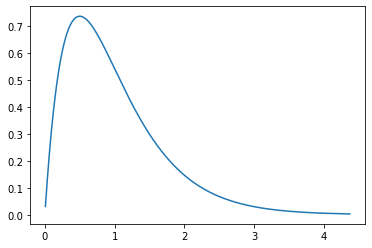

In [172]:

alpha, beta = 2,2
rvs = scipy.stats.gamma(a=alpha,scale=1/beta).rvs(1000)
x = np.linspace(np.min(rvs),np.max(rvs),10000)
print("Mean = {} Var = {}".format(np.mean(rvs),np.var(rvs)))
plt.plot(x,scipy.stats.gamma(a=alpha,scale=1/beta).pdf(x))

In [94]:
I2 = [2,6]
I3= [2,4,6]
I4=[1,3,5,7]
I5=[0,2,4,6,8]
I9= [0,1,2,3,4,5,6,7,8,9]

P_AM[I2]

TypeError: list indices must be integers or slices, not list

In [96]:
P_AM=np.array(P_AM)

In [97]:
I=[[2,6],[2,4,6],[1,3,5,7],[0,2,4,6,8],[0,1,2,3,4,5,6,7,8,9]]
for i in I:
    print(P_AM[np.array(i)])

[0.25 0.6 ]
[0.25 0.4  0.6 ]
[0.2 0.3 0.5 0.7]
[0.1  0.25 0.4  0.6  0.75]
[0.1  0.2  0.25 0.3  0.4  0.5  0.6  0.7  0.75 0.8 ]


In [98]:
P_AM

array([0.1 , 0.2 , 0.25, 0.3 , 0.4 , 0.5 , 0.6 , 0.7 , 0.75, 0.8 , 0.9 ])

In [90]:
test = Gibbs_Quantile(10000,N_AM[0],Q_AM[0],P_AM,"translated_weibull","normal","jeffreys","gamma",[10000,100],[2,2],[2,2],std_prop_loc=100,std_prop_scale=1000,std_prop_shape=.1,std_prop_quantile=.01,verbose=True,)

100%|██████████| 10000/10000 [03:41<00:00, 45.15it/s]


I= [ 221.  442.  553.  663.  884. 1105. 1326. 1547. 1657. 1768. 1989.] Q.shape= (11, 10001)
Acceptance rate of Q 0 = 38.25%
Acceptance rate of Q 1 = 54.86%
Acceptance rate of Q 2 = 47.36%
Acceptance rate of Q 3 = 48.05%
Acceptance rate of Q 4 = 50.34%
Acceptance rate of Q 5 = 47.78%
Acceptance rate of Q 6 = 49.68%
Acceptance rate of Q 7 = 48.49%
Acceptance rate of Q 8 = 47.26%
Acceptance rate of Q 9 = 53.80%
Acceptance rate of Q 10 = 40.25%
Acceptation rates MH : loc = 40.52% scale = 42.48% shape = 25.54% 


In [92]:
P_AM

[0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9]

In [38]:
Gibbs["chains"]

{'loc': array([9400.        , 9400.        , 9435.48164881, ..., 9834.17299675,
        9885.28352   , 9885.28352   ]),
 'scale': array([29401.97807644, 29401.97807644, 29401.97807644, ...,
        29401.97807644, 29401.97807644, 29401.97807644]),
 'shape': array([1.5       , 1.43028521, 1.43028521, ..., 1.3623146 , 1.3623146 ,
        1.3623146 ])}

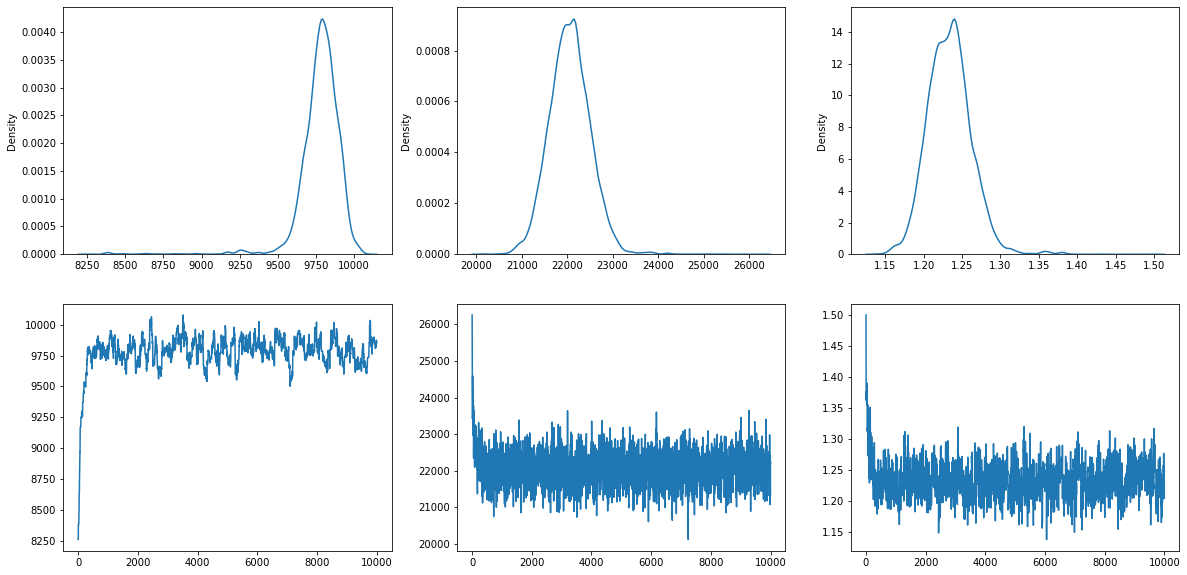

In [147]:
f,ax=plt.subplots(2,3,figsize=(20,10))
Gibbs=test
i=0
burnin=0
fin=10000
#print(np.mean(Gibbs["chains"][0][burnin:]),np.mean(Gibbs["chains"][1][burnin:]),np.mean(Gibbs["chains"][2][burnin:]))
sns.kdeplot(Gibbs["chains"]["loc"][burnin:fin],ax=ax[0,0])
ax[1,0].plot(Gibbs["chains"]["loc"][burnin:fin])

sns.kdeplot(Gibbs["chains"]["scale"][burnin:fin],ax=ax[0,1])
ax[1,1].plot(Gibbs["chains"]["scale"][burnin:fin])

sns.kdeplot(Gibbs["chains"]["shape"][burnin:fin],ax=ax[0,2])
ax[1,2].plot(Gibbs["chains"]["shape"][burnin:fin])


In [111]:
communes_alpes_maritimes = {
    6006: "Antibes",
    6007: "Aspremont",
    6010: "Auribeau-sur-Siagne",
    6011: "Auvare",
    6018: "Beaulieu-sur-Mer",
    6023: "Biot",
    6032: "Breil-sur-Roya",
    6038: "Le Broc",
    6044: "Cagnes-sur-Mer",
    6046: "Caille",
    6048: "Cannes",
    6054: "Le Cannet",
    6057: "Cantaron",
    6059: "Cap-d'Ail",
    6060: "Carros",
    6064: "Castagniers",
    6065: "Castellar",
    6075: "Châteauneuf-Grasse",
    6089: "Cipières",
    6090: "Clans",
    6095: "Coaraze",
    6105: "Colomars",
    6108: "Contes",
    6112: "Courmes",
    6114: "Coursegoules",
    6118: "La Colle-sur-Loup",
    6122: "Daluis",
    6126: "Drap",
    6128: "Duranus",
    6130: "Entraunes",
    6136: "Èze",
    6140: "Falicon",
    6147: "Les Ferres",
    6148: "Levens",
    6149: "La Gaude",
    6150: "Gilette",
    6159: "Gorbio",
}

# Exemple d'utilisation
code_geo = 6108
nom_commune = communes_alpes_maritimes.get(code_geo, "Code géographique non trouvé")
print(f"Le code géographique {code_geo} correspond à la commune de {nom_commune}.")


Le code géographique 6108 correspond à la commune de Contes.


In [121]:
Contes = AM.iloc[np.where(AM["CODGEO"]==code_geo)[0]]
Contes

,CODGEO,NBMEN,NBPERS,NBUC,PMIMP,Q1,Q2,Q3,Q3_Q1,D1,...,OPR5D9,OPR5RD,OPR5S80S20,OPR5GI,OPR5PACT,OPR5PTSA,OPR5PCHO,OPR5PBEN,OPR5PPEN,OPR5PAUT
1754,6108,2230,5600,3730.2,70.0,18540.0,26950,37520.0,18990.0,12560.0,...,138980.0,9.0,11.3,0.437,20.3,15.7,0.9,3.7,10.0,69.7


In [126]:
N_contes = Contes["NBMEN"]
N_contes

1754    2230
Name: NBMEN, dtype: int64

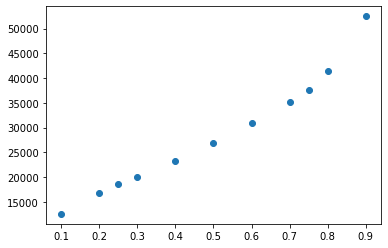

In [125]:
Q_contes = [float(Contes["D1"]),float(Contes["D2"]),float(Contes["Q1"]),float(Contes["D3"]),float(Contes["D4"]),float(Contes["Q2"]),float(Contes["D6"]),float(Contes["D7"]),float(Contes["Q3"]),float(Contes["D8"]),float(Contes["D9"])]
P_contes= [.1,.2,.25,.3 ,.4,.5,.6,.7,.75,.8,.9]
plt.scatter(P_contes,Q_contes)

In [100]:
AM.head()

,CODGEO,NBMEN,NBPERS,NBUC,PMIMP,Q1,Q2,Q3,Q3_Q1,D1,...,OPR5D9,OPR5RD,OPR5S80S20,OPR5GI,OPR5PACT,OPR5PTSA,OPR5PCHO,OPR5PBEN,OPR5PPEN,OPR5PAUT
1669,6006,898,2210,1483.2,74.0,20960.0,29150,40520.0,19560.0,14320.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1670,6007,1286,3364,2211.3,70.0,18610.0,25950,36400.0,17790.0,12340.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1671,6010,1206,3006,2007.6,65.0,17320.0,24850,35890.0,18570.0,10330.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1672,6011,1898,3673,2688.2,60.0,14980.0,23600,35110.0,20130.0,8200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1679,6018,3863,9309,6293.8,74.0,20410.0,30570,45150.0,24740.0,13280.0,...,142360.0,17.8,23.3,0.544,18.1,16.0,0.6,1.5,11.5,70.4


In [144]:
N_contes

1754    2230
Name: NBMEN, dtype: int64

In [145]:
test = Gibbs_Quantile(10000,int(N_contes),list(Q_contes),list(P_AM),"translated_weibull","normal","jeffreys","gamma",[10000,100],[2,2],[2,2],std_prop_loc=80,std_prop_scale=1000,std_prop_shape=.08,std_prop_quantile=.01,verbose=True)

100%|██████████| 10000/10000 [03:42<00:00, 44.91it/s]


I= [ 223.  446.  558.  669.  892. 1115. 1338. 1561. 1672. 1784. 2007.] Q.shape= (11, 10001)
Acceptance rate of Q 0 = 32.84%
Acceptance rate of Q 1 = 57.46%
Acceptance rate of Q 2 = 49.61%
Acceptance rate of Q 3 = 50.55%
Acceptance rate of Q 4 = 54.31%
Acceptance rate of Q 5 = 53.98%
Acceptance rate of Q 6 = 48.82%
Acceptance rate of Q 7 = 44.63%
Acceptance rate of Q 8 = 43.99%
Acceptance rate of Q 9 = 48.85%
Acceptance rate of Q 10 = 39.44%
Acceptation rates MH : loc = 22.81% scale = 41.25% shape = 23.25% 


In [149]:
I=[[3,7],[2,5,8],[1,4,6,9],[0,3,5,7,9],[0,1,3,4,5,6,7,9,10],[0,1,2,3,4,5,6,7,8,9,10]]
for i in I:
    print(P_AM[np.array(i)],np.array(Q_contes)[np.array(i)])
    print

[0.3 0.7] [19960. 35170.]
[0.25 0.5  0.75] [18540. 26950. 37520.]
[0.2 0.4 0.6 0.8] [16860. 23320. 30830. 41470.]
[0.1 0.3 0.5 0.7 0.8] [12560. 19960. 26950. 35170. 41470.]
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9] [12560. 16860. 19960. 23320. 26950. 30830. 35170. 41470. 52490.]
[0.1  0.2  0.25 0.3  0.4  0.5  0.6  0.7  0.75 0.8  0.9 ] [12560. 16860. 18540. 19960. 23320. 26950. 30830. 35170. 37520. 41470.
 52490.]


In [176]:
Test2 = []
for i in I:
    Test2.append(Gibbs_Quantile(30000,int(N_contes),list(np.array(Q_contes)[np.array(i)]),list(np.array(P_contes)[np.array(i)]),"translated_weibull","normal","jeffreys","gamma",[10000,1000],[2,2],[2,2],std_prop_loc=80,std_prop_scale=1000,std_prop_shape=.06,std_prop_quantile=.01,verbose=True))

100%|██████████| 30000/30000 [06:07<00:00, 81.56it/s]


I= [ 669. 1561.] Q.shape= (2, 30001)
Acceptance rate of Q 0 = 51.66%
Acceptance rate of Q 1 = 51.17%
Acceptation rates MH : loc = 43.71% scale = 39.73% shape = 38.39% 


100%|██████████| 30000/30000 [07:46<00:00, 64.34it/s]


I= [ 558. 1115. 1672.] Q.shape= (3, 30001)
Acceptance rate of Q 0 = 50.48%
Acceptance rate of Q 1 = 54.55%
Acceptance rate of Q 2 = 49.47%
Acceptation rates MH : loc = 58.14% scale = 37.77% shape = 40.87% 


100%|██████████| 30000/30000 [08:46<00:00, 57.03it/s]


I= [ 446.  892. 1338. 1784.] Q.shape= (4, 30001)
Acceptance rate of Q 0 = 47.07%
Acceptance rate of Q 1 = 54.56%
Acceptance rate of Q 2 = 52.26%
Acceptance rate of Q 3 = 47.64%
Acceptation rates MH : loc = 48.44% scale = 38.75% shape = 38.86% 


100%|██████████| 30000/30000 [10:11<00:00, 49.02it/s]


I= [ 223.  669. 1115. 1561. 1784.] Q.shape= (5, 30001)
Acceptance rate of Q 0 = 38.66%
Acceptance rate of Q 1 = 53.10%
Acceptance rate of Q 2 = 53.12%
Acceptance rate of Q 3 = 51.81%
Acceptance rate of Q 4 = 48.50%
Acceptation rates MH : loc = 63.31% scale = 39.30% shape = 41.70% 


100%|██████████| 30000/30000 [19:48<00:00, 25.25it/s]   


I= [ 223.  446.  669.  892. 1115. 1338. 1561. 1784. 2007.] Q.shape= (9, 30001)
Acceptance rate of Q 0 = 38.95%
Acceptance rate of Q 1 = 51.48%
Acceptance rate of Q 2 = 48.98%
Acceptance rate of Q 3 = 52.55%
Acceptance rate of Q 4 = 52.61%
Acceptance rate of Q 5 = 51.50%
Acceptance rate of Q 6 = 50.44%
Acceptance rate of Q 7 = 49.56%
Acceptance rate of Q 8 = 40.53%
Acceptation rates MH : loc = 58.99% scale = 40.45% shape = 40.57% 


100%|██████████| 30000/30000 [16:52<00:00, 29.63it/s]   


I= [ 223.  446.  558.  669.  892. 1115. 1338. 1561. 1672. 1784. 2007.] Q.shape= (11, 30001)
Acceptance rate of Q 0 = 38.28%
Acceptance rate of Q 1 = 51.63%
Acceptance rate of Q 2 = 46.31%
Acceptance rate of Q 3 = 48.54%
Acceptance rate of Q 4 = 53.10%
Acceptance rate of Q 5 = 53.12%
Acceptance rate of Q 6 = 50.75%
Acceptance rate of Q 7 = 46.77%
Acceptance rate of Q 8 = 45.77%
Acceptance rate of Q 9 = 50.51%
Acceptance rate of Q 10 = 40.37%
Acceptation rates MH : loc = 59.85% scale = 40.07% shape = 40.56% 


In [156]:
Test[np.array([1,2,4,5])]

TypeError: only integer scalar arrays can be converted to a scalar index

In [1]:
f,ax=plt.subplots(2,3,figsize=(20,10))
Gibbs=test
i=0
burnin=1000
fin=100000
for i,Gibbs in enumerate(Test2[:1]):
    if i in []:
#print(np.mean(Gibbs["chains"][0][burnin:]),np.mean(Gibbs["chains"][1][burnin:]),np.mean(Gibbs["chains"][2][burnin:]))
        sns.kdeplot(Gibbs["chains"]["loc"][burnin:fin],ax=ax[0,0],label="M = {}".format(len(I[i])))
        ax[1,0].plot(Gibbs["chains"]["loc"][burnin:fin])
        ax[0,0].legend()
        sns.kdeplot(Gibbs["chains"]["scale"][burnin:fin],ax=ax[0,1],label="M = {}".format(len(I[i])))
        ax[1,1].plot(Gibbs["chains"]["scale"][burnin:fin])
        ax[0,1].legend()

        sns.kdeplot(Gibbs["chains"]["shape"][burnin:fin],ax=ax[0,2])
        ax[1,2].plot(Gibbs["chains"]["shape"][burnin:fin])

NameError: name 'plt' is not defined

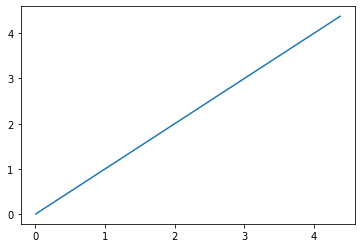

In [181]:
plt.plot(x,x)

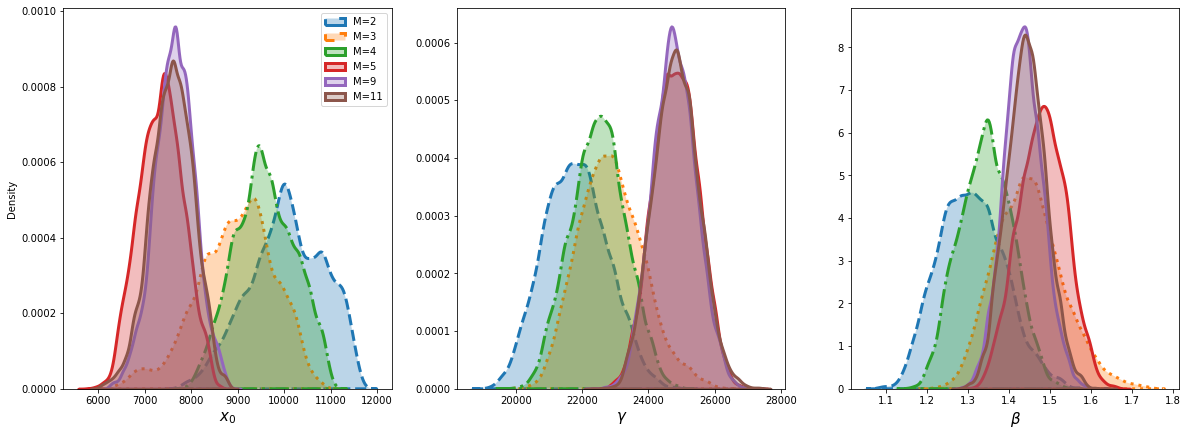

In [185]:
f,ax=plt.subplots(1,3,figsize=(20,7))
LS=["--","dotted","-.","-","-",'-']
burnin=1000
lw=3
Gibbs=test
i=0
for i,k in enumerate(Test2):
    Gibbs=Test2[i]
    sns.kdeplot(Gibbs["chains"]["loc"][burnin:],ax=ax[0],label="M={}".format(len(I[i])),alpha=.3,fill=True,linewidth=lw,linestyle=LS[i])
    
    sns.kdeplot(Gibbs["chains"]["scale"][burnin:],ax=ax[1],alpha=.3,fill=True,linewidth=lw,linestyle=LS[i])

    sns.kdeplot(Gibbs["chains"]["shape"][burnin:],ax=ax[2],alpha=.3,fill=True,linewidth=lw,linestyle=LS[i])

fontsize=15
ax[0].set_xlabel("$x_0$",fontsize=fontsize)
ax[1].set_xlabel("$\gamma$",fontsize=fontsize)
ax[1].set_ylabel("",fontsize=fontsize)
ax[2].set_xlabel("$\\beta$",fontsize=fontsize)
ax[2].set_ylabel("",fontsize=fontsize)

ax[0].legend()

plt.savefig("filogure_6.png")